In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/users-vs-bots-classification/bots_vs_users.csv


# DATA-LOADING AND PREPROCESSING 

In [2]:
df = pd.read_csv('/kaggle/input/users-vs-bots-classification/bots_vs_users.csv',na_values=['(NA)','(NAN)','(inf)','(Unknown)']).fillna(-999)

In [3]:
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,Unknown,2.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Saint Petersburg,1.0,0.0,1.0,Unknown
5870,1.0,Unknown,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Saint Petersburg,1.0,1.0,0.0,Unknown
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Saint Petersburg,1.0,1.0,0.0,Unknown
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Moscow,1.0,0.0,1.0,Unknown


In [4]:
df = df.replace({'Unknown':'0'})

In [5]:
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,0,0,0,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,0,0,0,0,0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,0,0,0,0,0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,0,2.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Saint Petersburg,1.0,0.0,1.0,0
5870,1.0,0,1.0,0.0,0.0,0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Saint Petersburg,1.0,1.0,0.0,0
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Saint Petersburg,1.0,1.0,0.0,0
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,-999.0,-999.0,-999.00,-999.0,-999.00,Moscow,1.0,0.0,1.0,0


In [6]:
df['city'].value_counts()

city
0                        2780
Saint Petersburg         1549
Kostomuksha               405
Moscow                    335
Petrozavodsk              103
                         ... 
Schekino                    1
Kachkanar                   1
Novaya (taitskoe G/p)       1
Eysk                        1
Ishim                       1
Name: count, Length: 362, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [8]:
mean = df.mode()

In [9]:
df.fillna(mean,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [11]:
df = df.drop(columns=['city','is_blacklisted'])

In [12]:
df = df.astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   float64
 1   has_birth_date              5874 non-null   float64
 2   has_photo                   5874 non-null   float64
 3   can_post_on_wall            5874 non-null   float64
 4   can_send_message            5874 non-null   float64
 5   has_website                 5874 non-null   float64
 6   gender                      5874 non-null   float64
 7   has_short_name              5874 non-null   float64
 8   has_first_name              5874 non-null   float64
 9   has_last_name               5874 non-null   float64
 10  access_to_closed_profile    5874 non-null   float64
 11  is_profile_closed           5874 non-null   float64
 12  target                      5874 non-null   float64
 13  has_nickname                5874 

In [14]:
# Converting all the zeros with the mean value for each column where the 0 present.
for col in df.columns:
    non_zero_mean = df[df[col] != -999][col].mean()  # Compute mean excluding 0s
    df[col] = df[col].replace(-999, non_zero_mean)

In [15]:
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,reposts_ratio,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009,1.0,0.0,1.0,0.0
5870,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009,1.0,1.0,0.0,0.0
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009,1.0,1.0,0.0,0.0
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009,1.0,0.0,1.0,0.0


In [16]:
df = df.astype(int)

In [17]:
df.isnull().sum()

has_domain                    0
has_birth_date                0
has_photo                     0
can_post_on_wall              0
can_send_message              0
has_website                   0
gender                        0
has_short_name                0
has_first_name                0
has_last_name                 0
access_to_closed_profile      0
is_profile_closed             0
target                        0
has_nickname                  0
has_maiden_name               0
has_mobile                    0
all_posts_visible             0
audio_available               0
has_interests                 0
has_books                     0
has_tv                        0
has_quotes                    0
has_about                     0
has_games                     0
has_movies                    0
has_activities                0
has_music                     0
can_add_as_friend             0
can_invite_to_group           0
subscribers_count             0
has_career                    0
has_mili

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   has_domain                  5874 non-null   int64
 1   has_birth_date              5874 non-null   int64
 2   has_photo                   5874 non-null   int64
 3   can_post_on_wall            5874 non-null   int64
 4   can_send_message            5874 non-null   int64
 5   has_website                 5874 non-null   int64
 6   gender                      5874 non-null   int64
 7   has_short_name              5874 non-null   int64
 8   has_first_name              5874 non-null   int64
 9   has_last_name               5874 non-null   int64
 10  access_to_closed_profile    5874 non-null   int64
 11  is_profile_closed           5874 non-null   int64
 12  target                      5874 non-null   int64
 13  has_nickname                5874 non-null   int64
 14  has_maid

In [19]:
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,reposts_ratio,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1,1,0,0,0,0,1,1,1,1,...,0,0,623,66,0,0,0,0,0,0
1,1,1,0,0,0,0,1,1,1,1,...,0,0,623,66,0,0,0,0,0,0
2,1,1,0,0,0,0,1,1,1,1,...,0,0,623,66,0,0,0,0,0,0
3,1,1,0,0,0,0,1,1,1,1,...,0,0,623,66,0,0,0,0,0,0
4,1,1,0,0,0,0,1,1,1,1,...,0,0,623,66,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1,1,1,0,0,0,2,1,1,1,...,0,0,623,66,0,0,1,0,1,0
5870,1,0,1,0,0,0,1,1,1,1,...,0,0,623,66,0,0,1,1,0,0
5871,1,1,0,0,0,1,2,1,1,1,...,0,0,623,66,0,0,1,1,0,0
5872,1,1,1,0,0,1,1,1,1,1,...,0,0,623,66,0,0,1,0,1,0


In [20]:
df.columns

Index(['has_domain', 'has_birth_date', 'has_photo', 'can_post_on_wall',
       'can_send_message', 'has_website', 'gender', 'has_short_name',
       'has_first_name', 'has_last_name', 'access_to_closed_profile',
       'is_profile_closed', 'target', 'has_nickname', 'has_maiden_name',
       'has_mobile', 'all_posts_visible', 'audio_available', 'has_interests',
       'has_books', 'has_tv', 'has_quotes', 'has_about', 'has_games',
       'has_movies', 'has_activities', 'has_music', 'can_add_as_friend',
       'can_invite_to_group', 'subscribers_count', 'has_career',
       'has_military_service', 'has_hometown', 'marital_status',
       'has_universities', 'has_schools', 'has_relatives', 'is_verified',
       'is_confirmed', 'has_status', 'posts_count', 'avg_likes', 'links_ratio',
       'hashtags_ratio', 'avg_keywords', 'avg_text_length',
       'attachments_ratio', 'avg_comments', 'reposts_ratio', 'ads_ratio',
       'avg_views', 'posting_frequency_days', 'phone_numbers_ratio',
       

# DATA VIZULALIZATION
> By the help of Heat-Map one things is clear, that so many columns are not goona help very much,because they have only one type of values avaliabel, which cannot help in the model training and testing.

> Histogram show the imbalance in the dataset. The model may fail to learn meaningful patterns

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

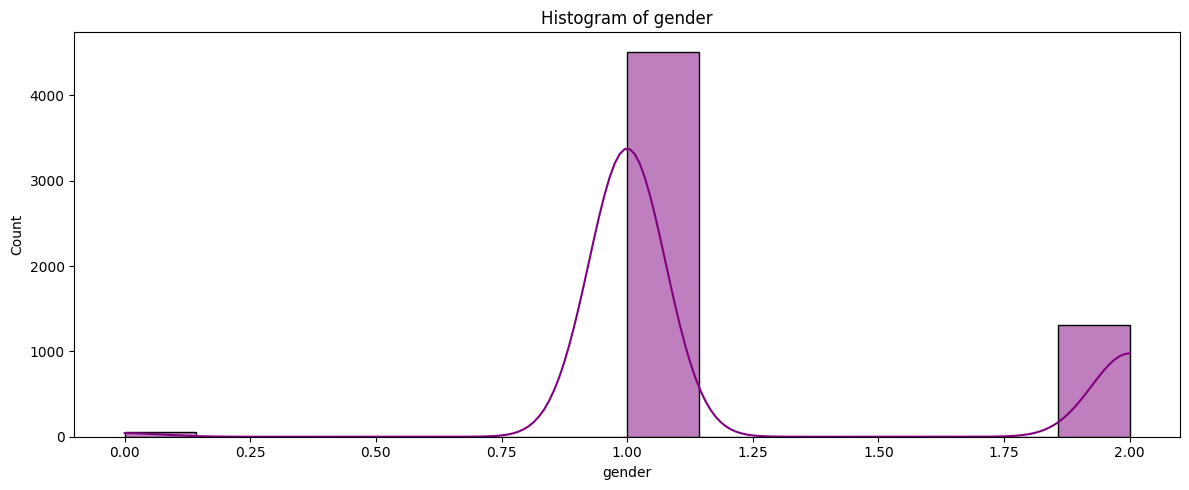

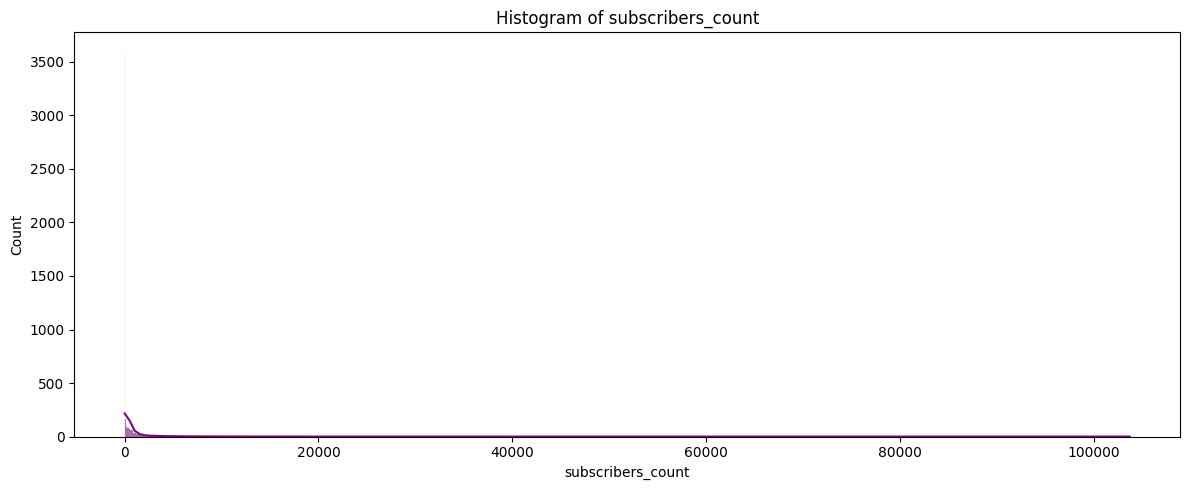

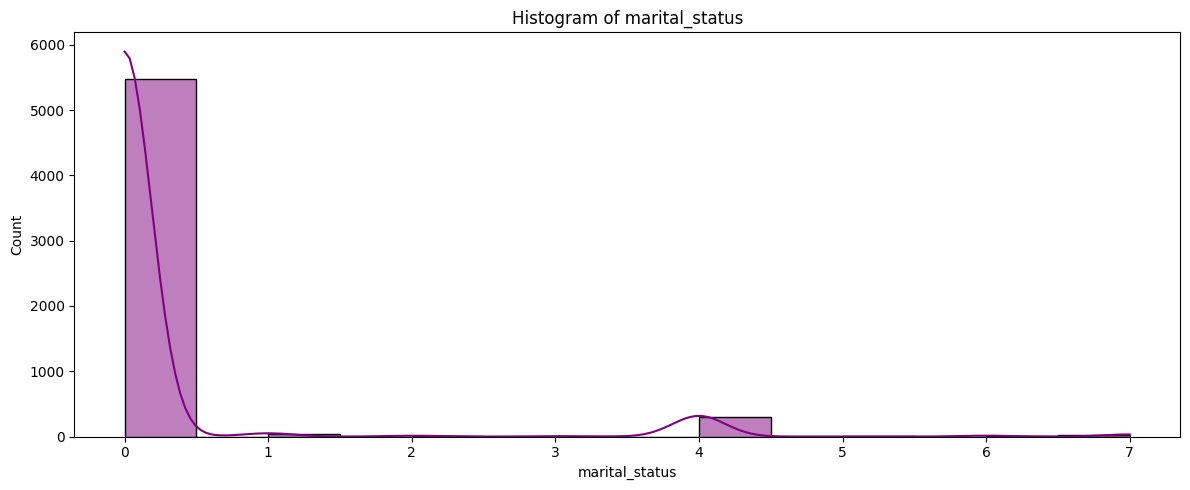

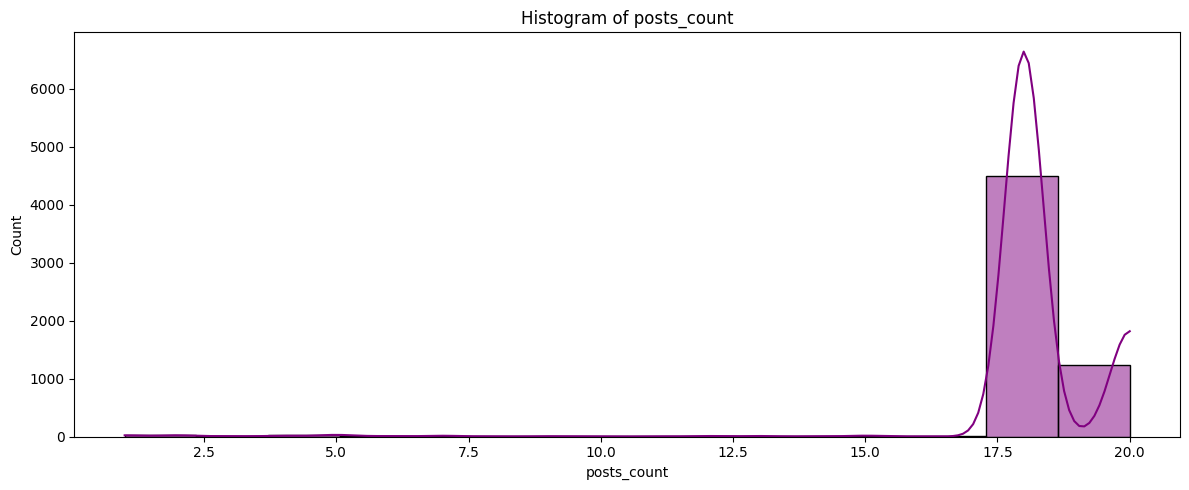

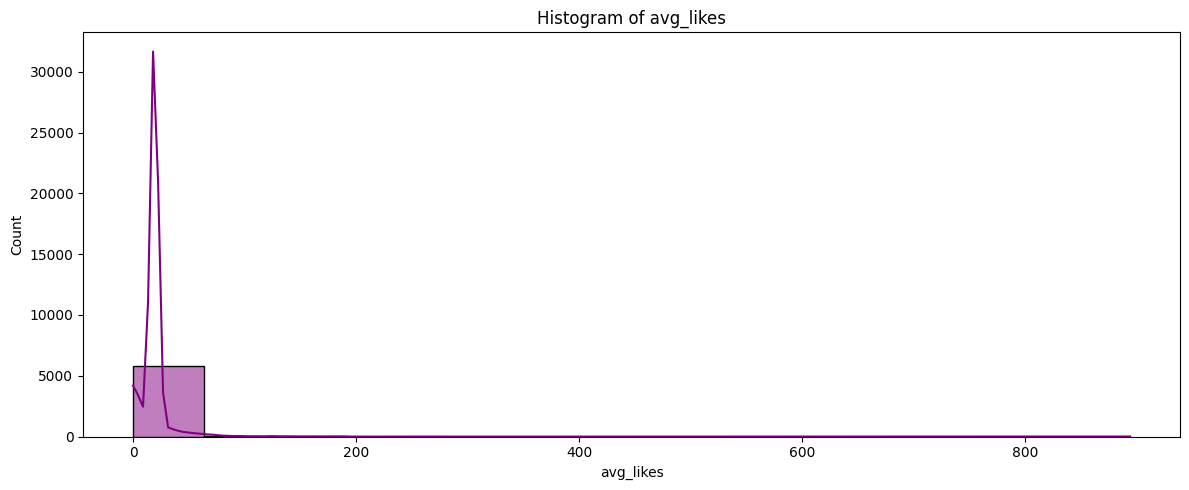

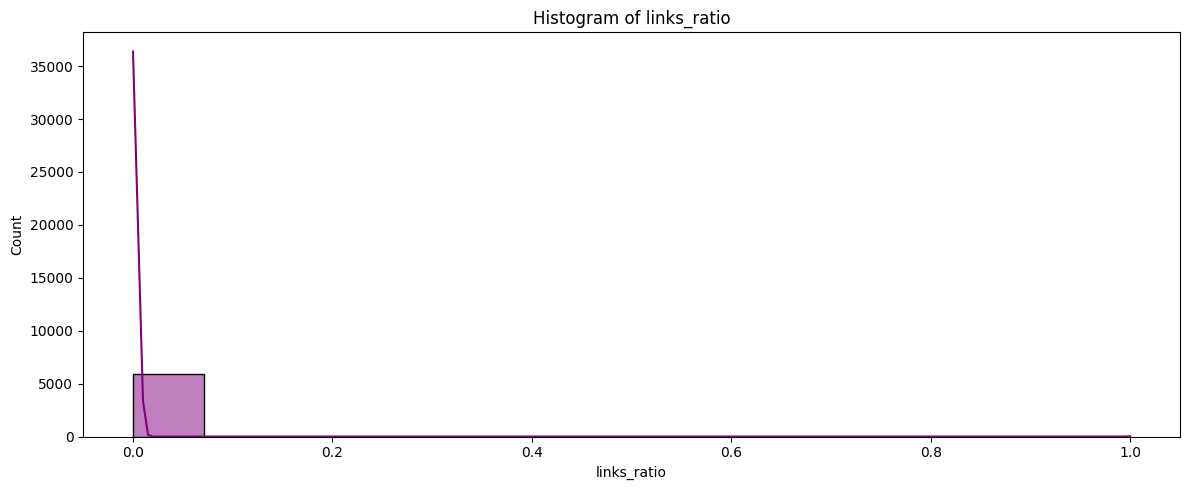

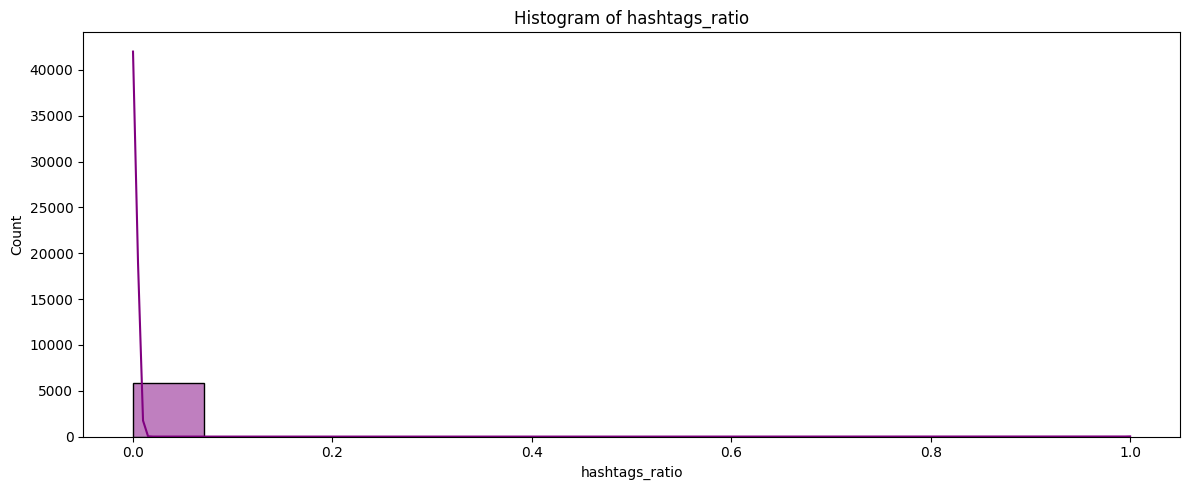

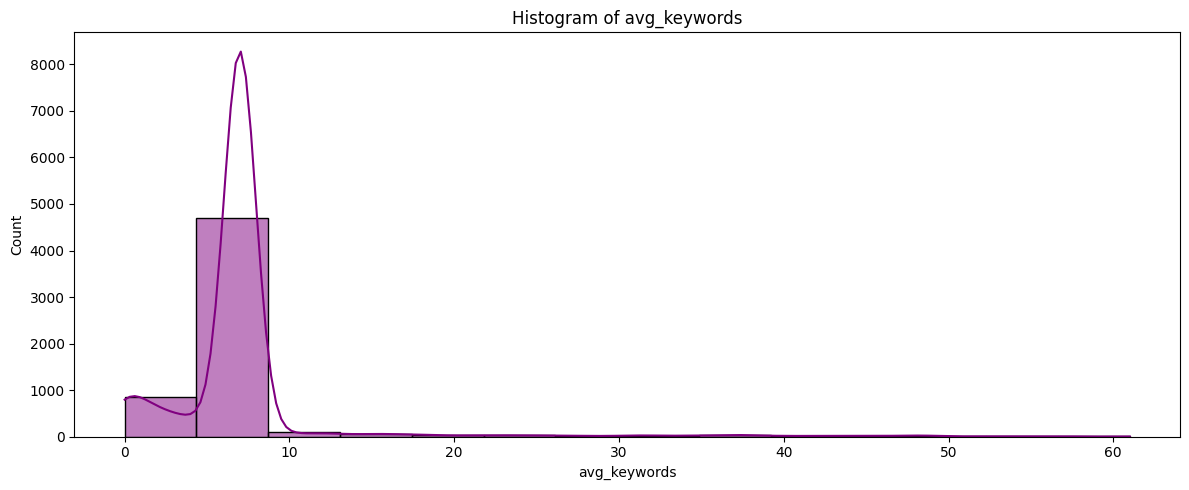

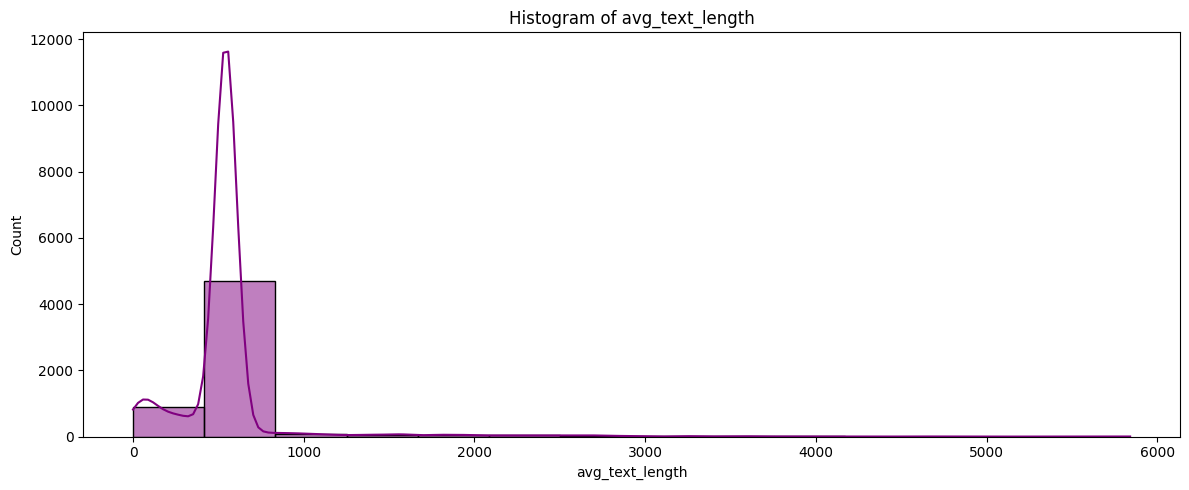

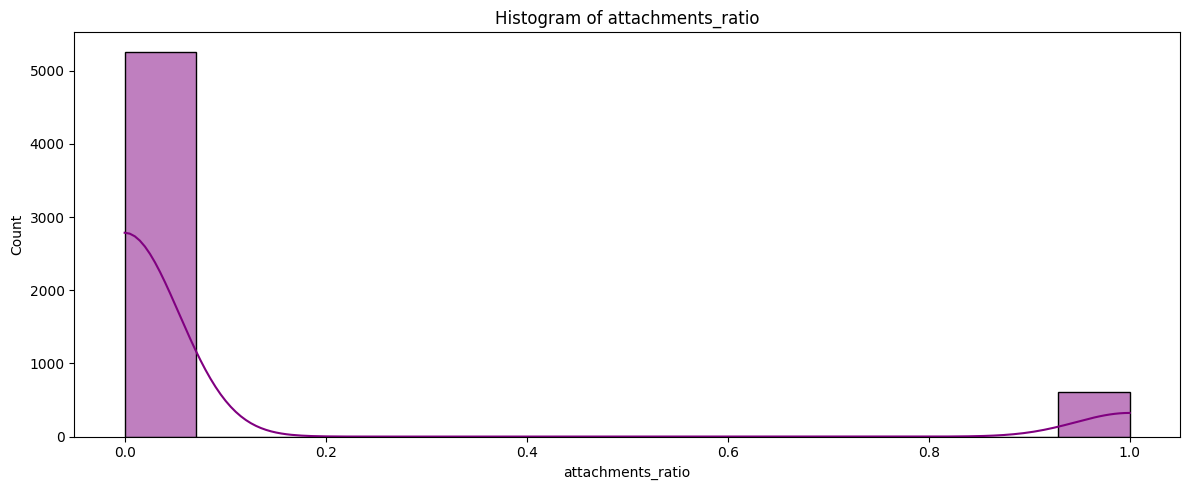

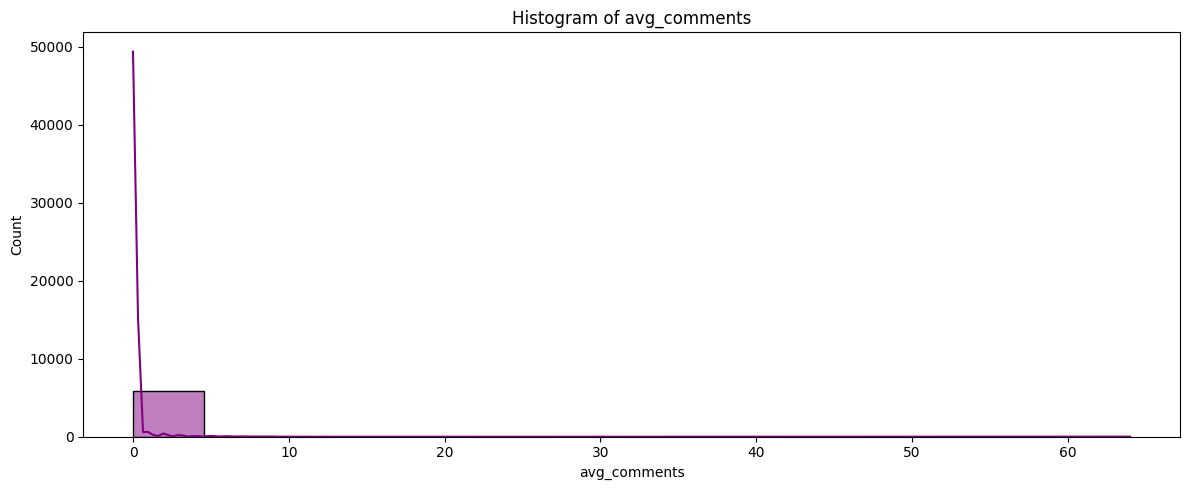

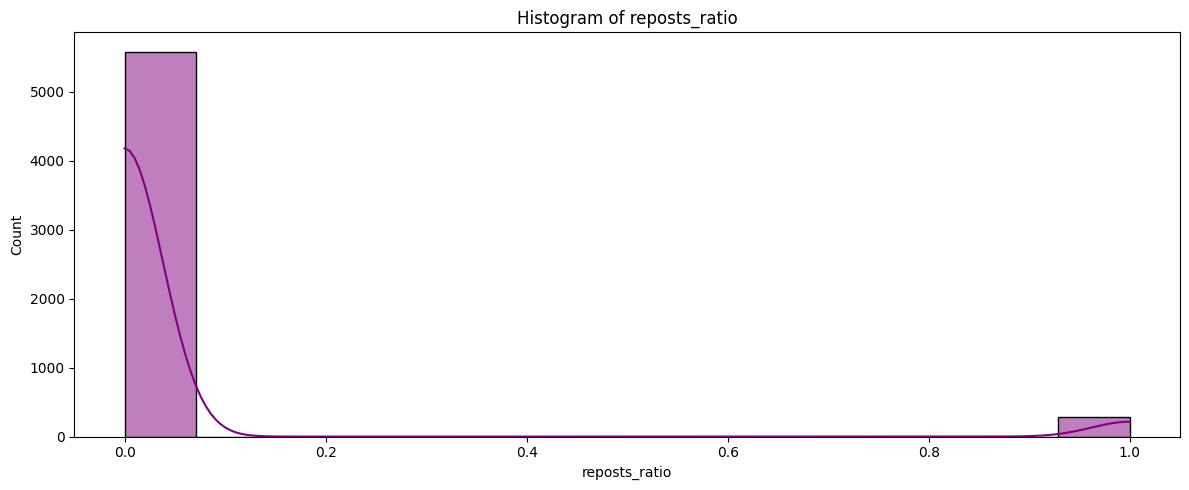

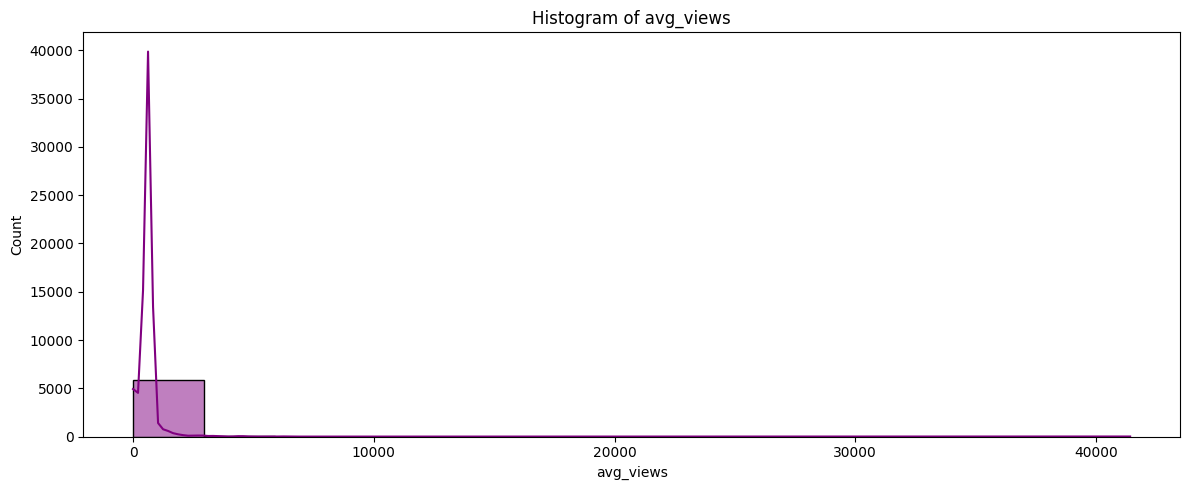

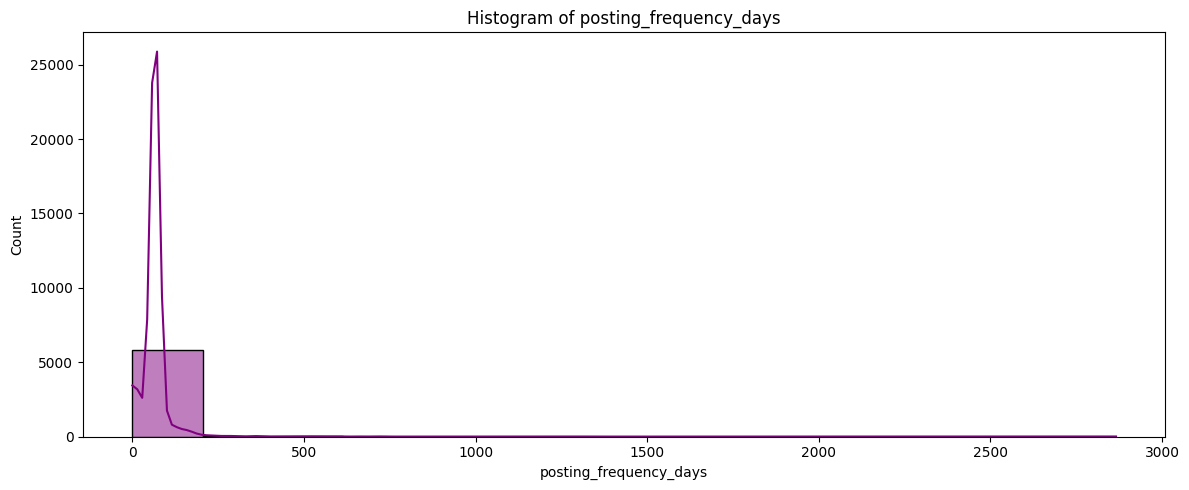

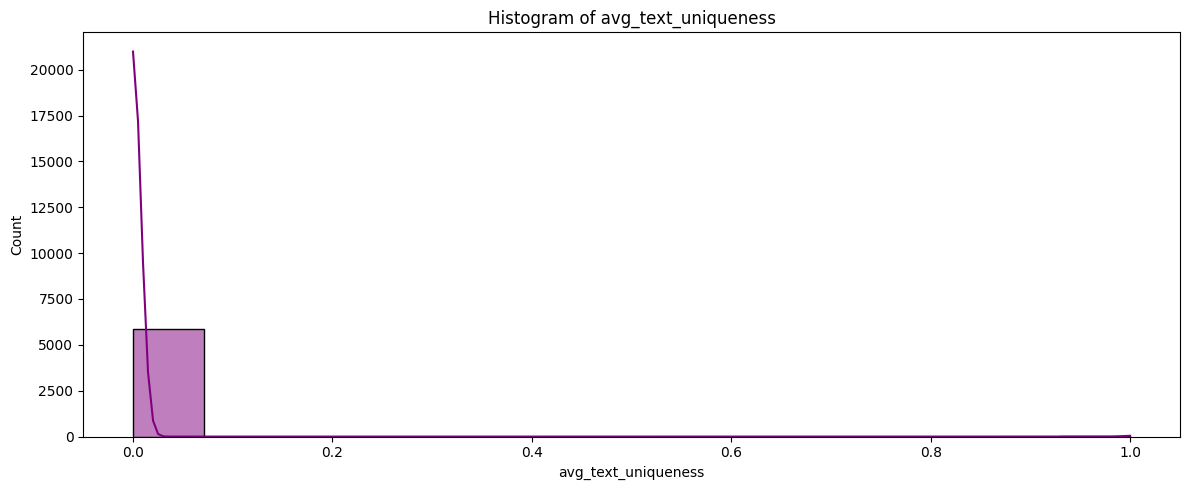

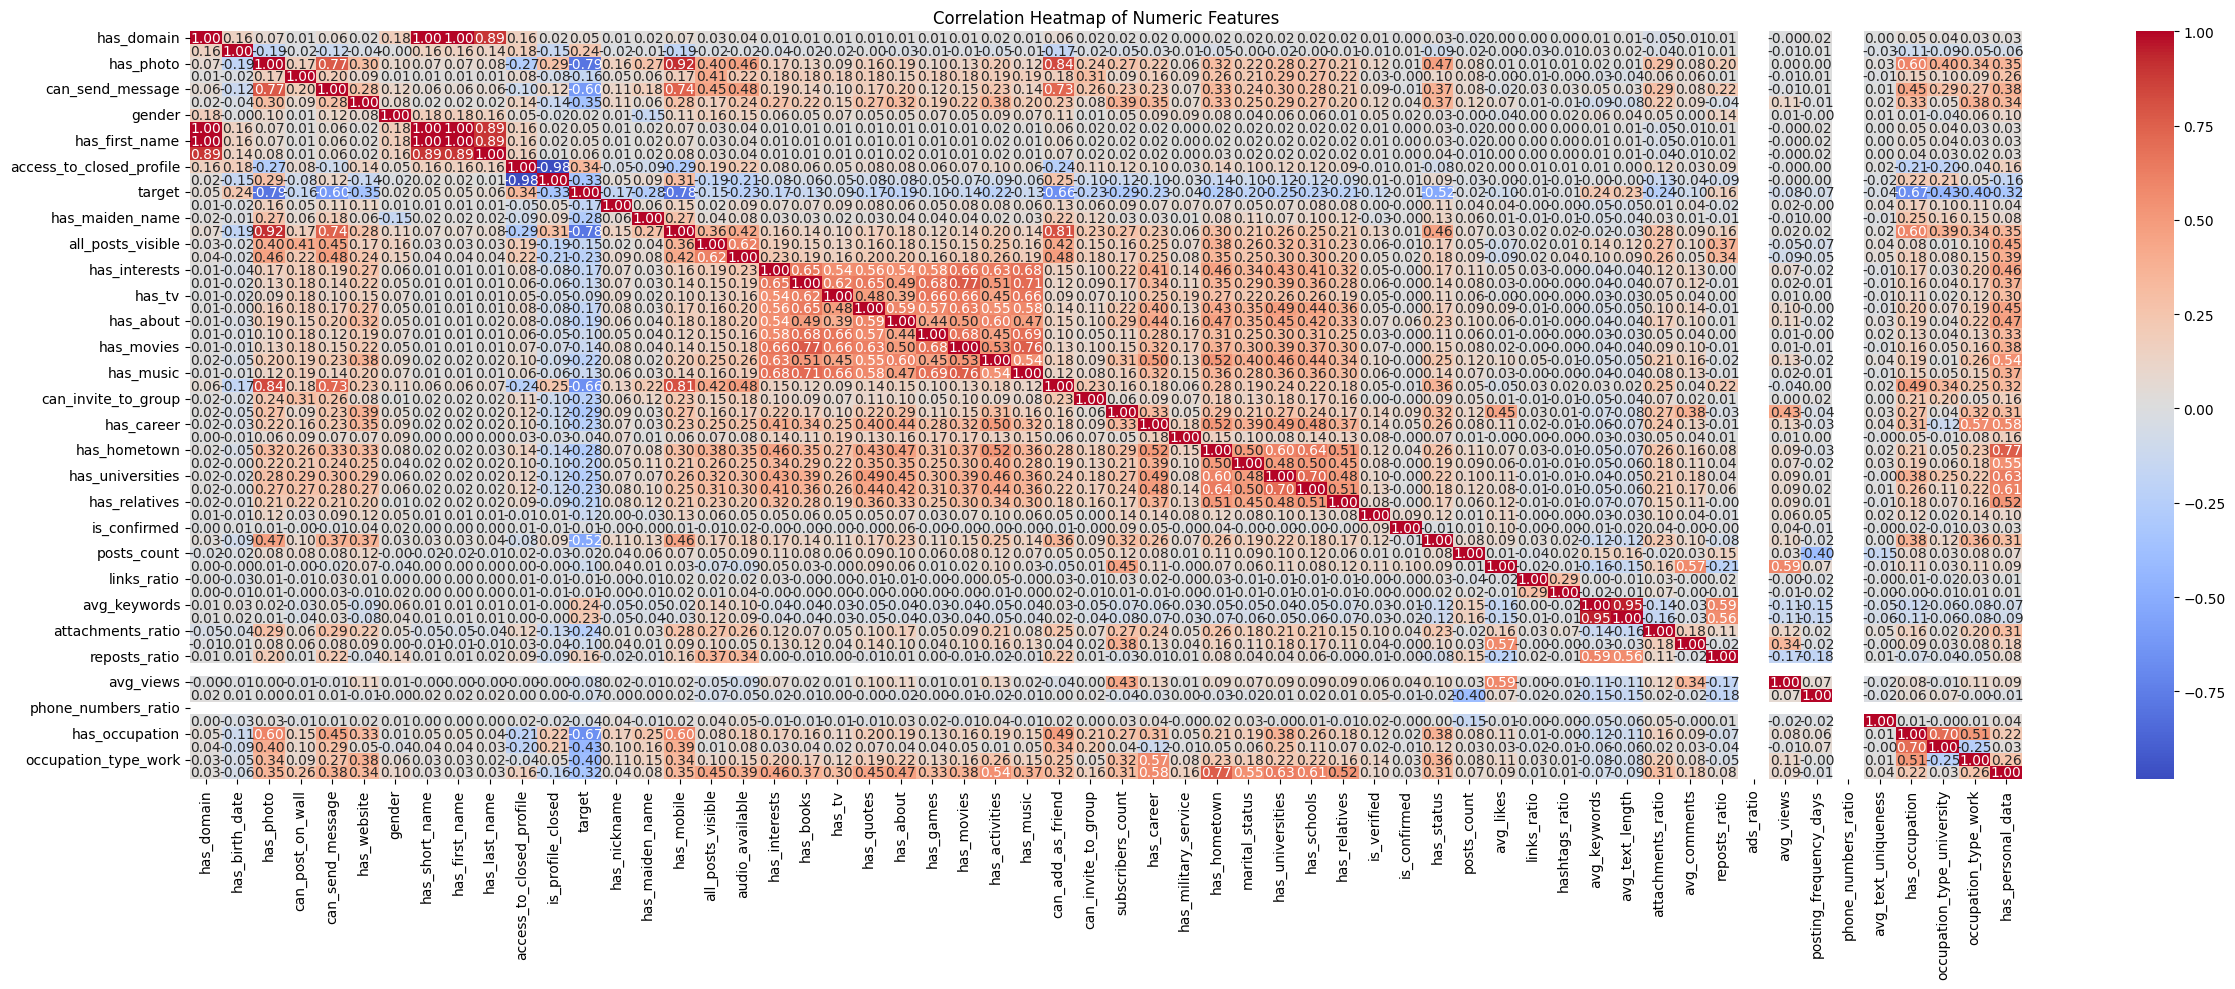

In [22]:
# HISTOGRAM PLOT

cols = ['gender',  'subscribers_count',   'marital_status', 'posts_count', 'avg_likes', 'links_ratio',
       'hashtags_ratio', 'avg_keywords', 'avg_text_length','attachments_ratio', 'avg_comments', 'reposts_ratio', 
       'avg_views', 'posting_frequency_days','avg_text_uniqueness']

for features in cols:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.histplot(df[features].dropna(),kde=True,color='purple')
        plt.title(f'Histogram of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()






# HEAT MAP
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(25,10))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()




In [23]:
drp = ['has_domain', 'has_birth_date', 'has_photo', 'can_post_on_wall','can_send_message', 'has_website', 'has_short_name','has_first_name',
        'has_last_name', 'access_to_closed_profile','is_profile_closed', 'has_nickname', 'has_maiden_name','has_mobile', 'all_posts_visible',
        'audio_available', 'has_interests','has_books', 'has_tv', 'has_quotes', 'has_about', 'has_games','has_movies', 'has_activities', 'has_music',
        'can_add_as_friend','can_invite_to_group', 'has_career','has_military_service', 'has_hometown',
       'has_universities', 'has_schools', 'has_relatives', 'is_verified','is_confirmed', 'has_status',  'ads_ratio',
        'phone_numbers_ratio', 'has_occupation', 'occupation_type_university',
       'occupation_type_work', 'has_personal_data']
for column in drp:
    df.drop(column,axis=1,inplace=True)

In [24]:
df.columns

Index(['gender', 'target', 'subscribers_count', 'marital_status',
       'posts_count', 'avg_likes', 'links_ratio', 'hashtags_ratio',
       'avg_keywords', 'avg_text_length', 'attachments_ratio', 'avg_comments',
       'reposts_ratio', 'avg_views', 'posting_frequency_days',
       'avg_text_uniqueness'],
      dtype='object')

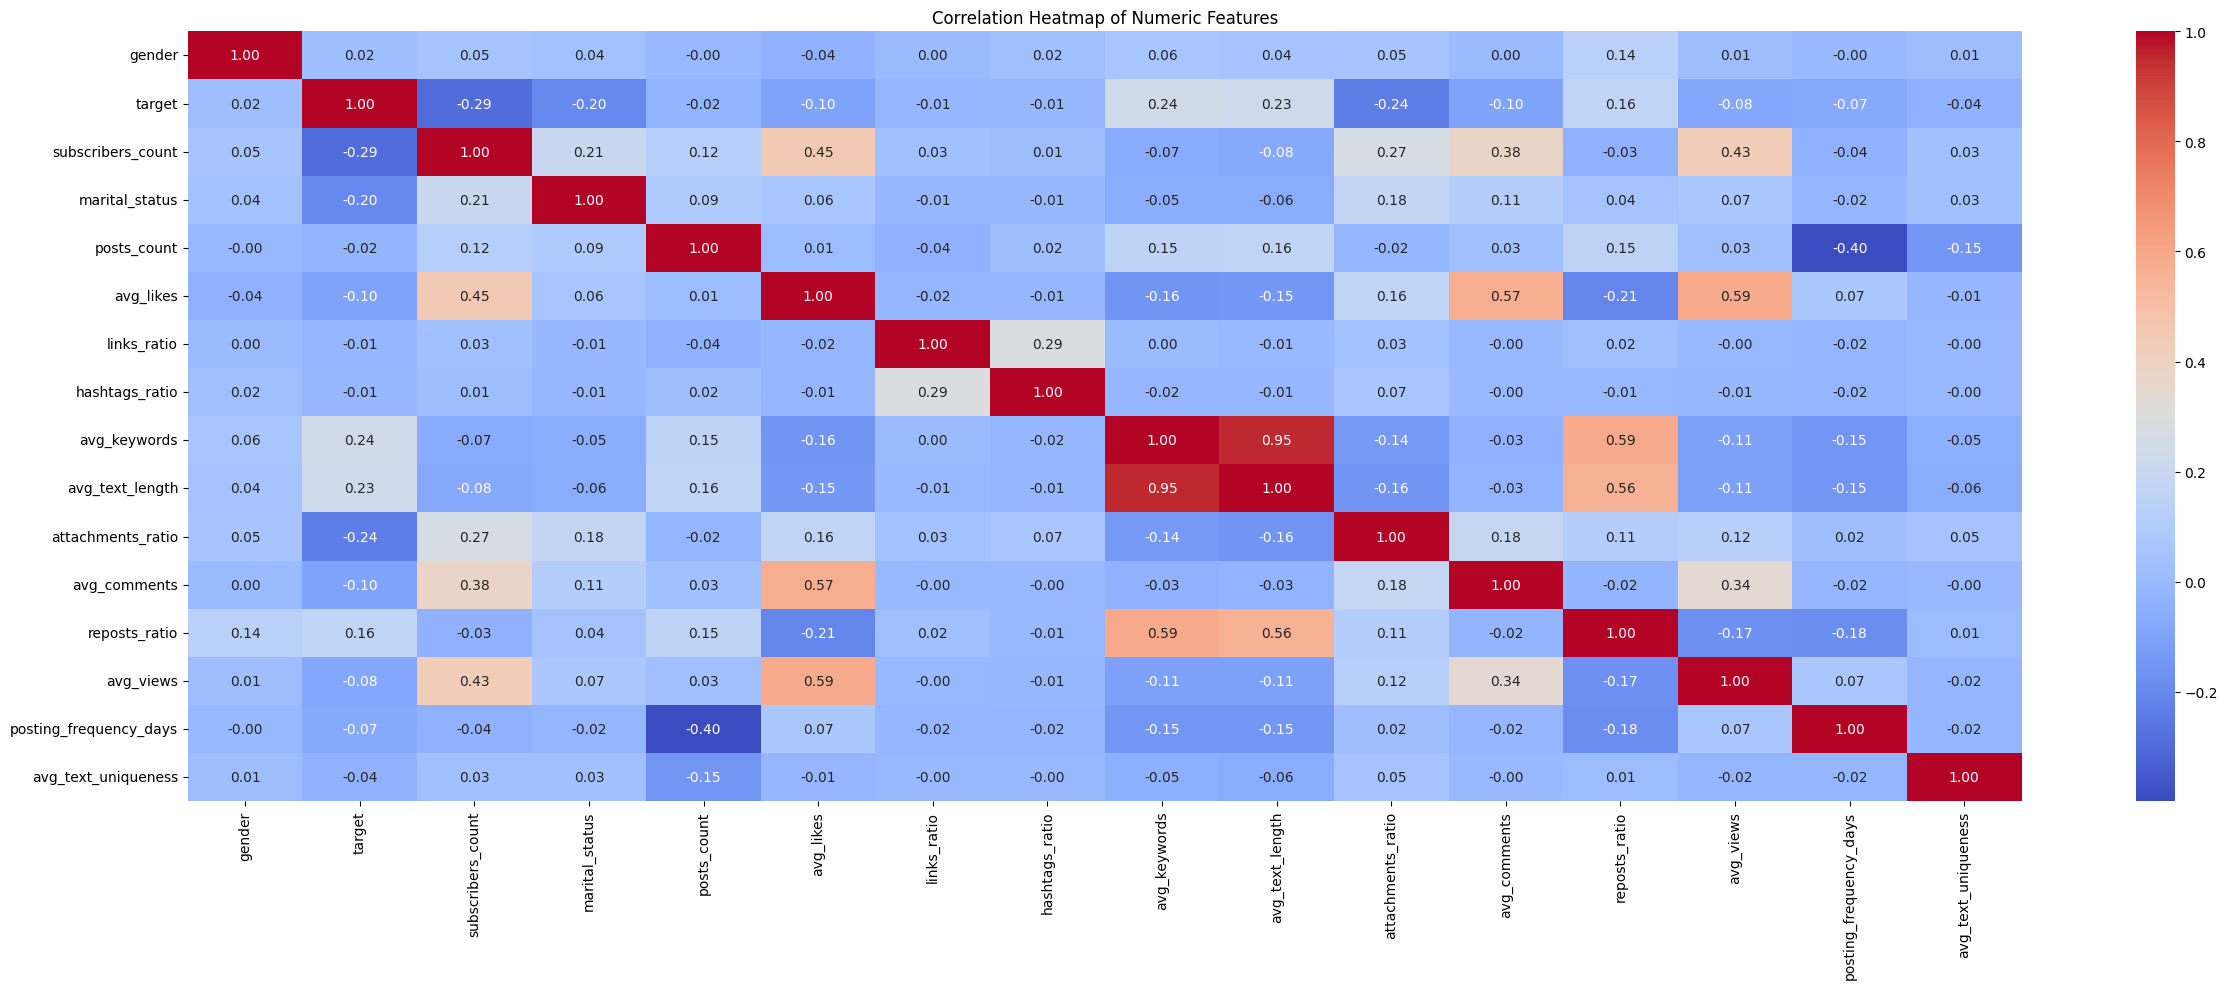

In [25]:
# HEAT-MAP after removeing unwanted columns.

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(25,10))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

In [26]:
feat = ['gender', 'subscribers_count', 'marital_status', 'posts_count',
       'avg_likes', 'links_ratio', 'hashtags_ratio', 'avg_keywords',
       'avg_text_length', 'attachments_ratio', 'avg_comments', 'reposts_ratio',
       'avg_views', 'posting_frequency_days', 'avg_text_uniqueness']

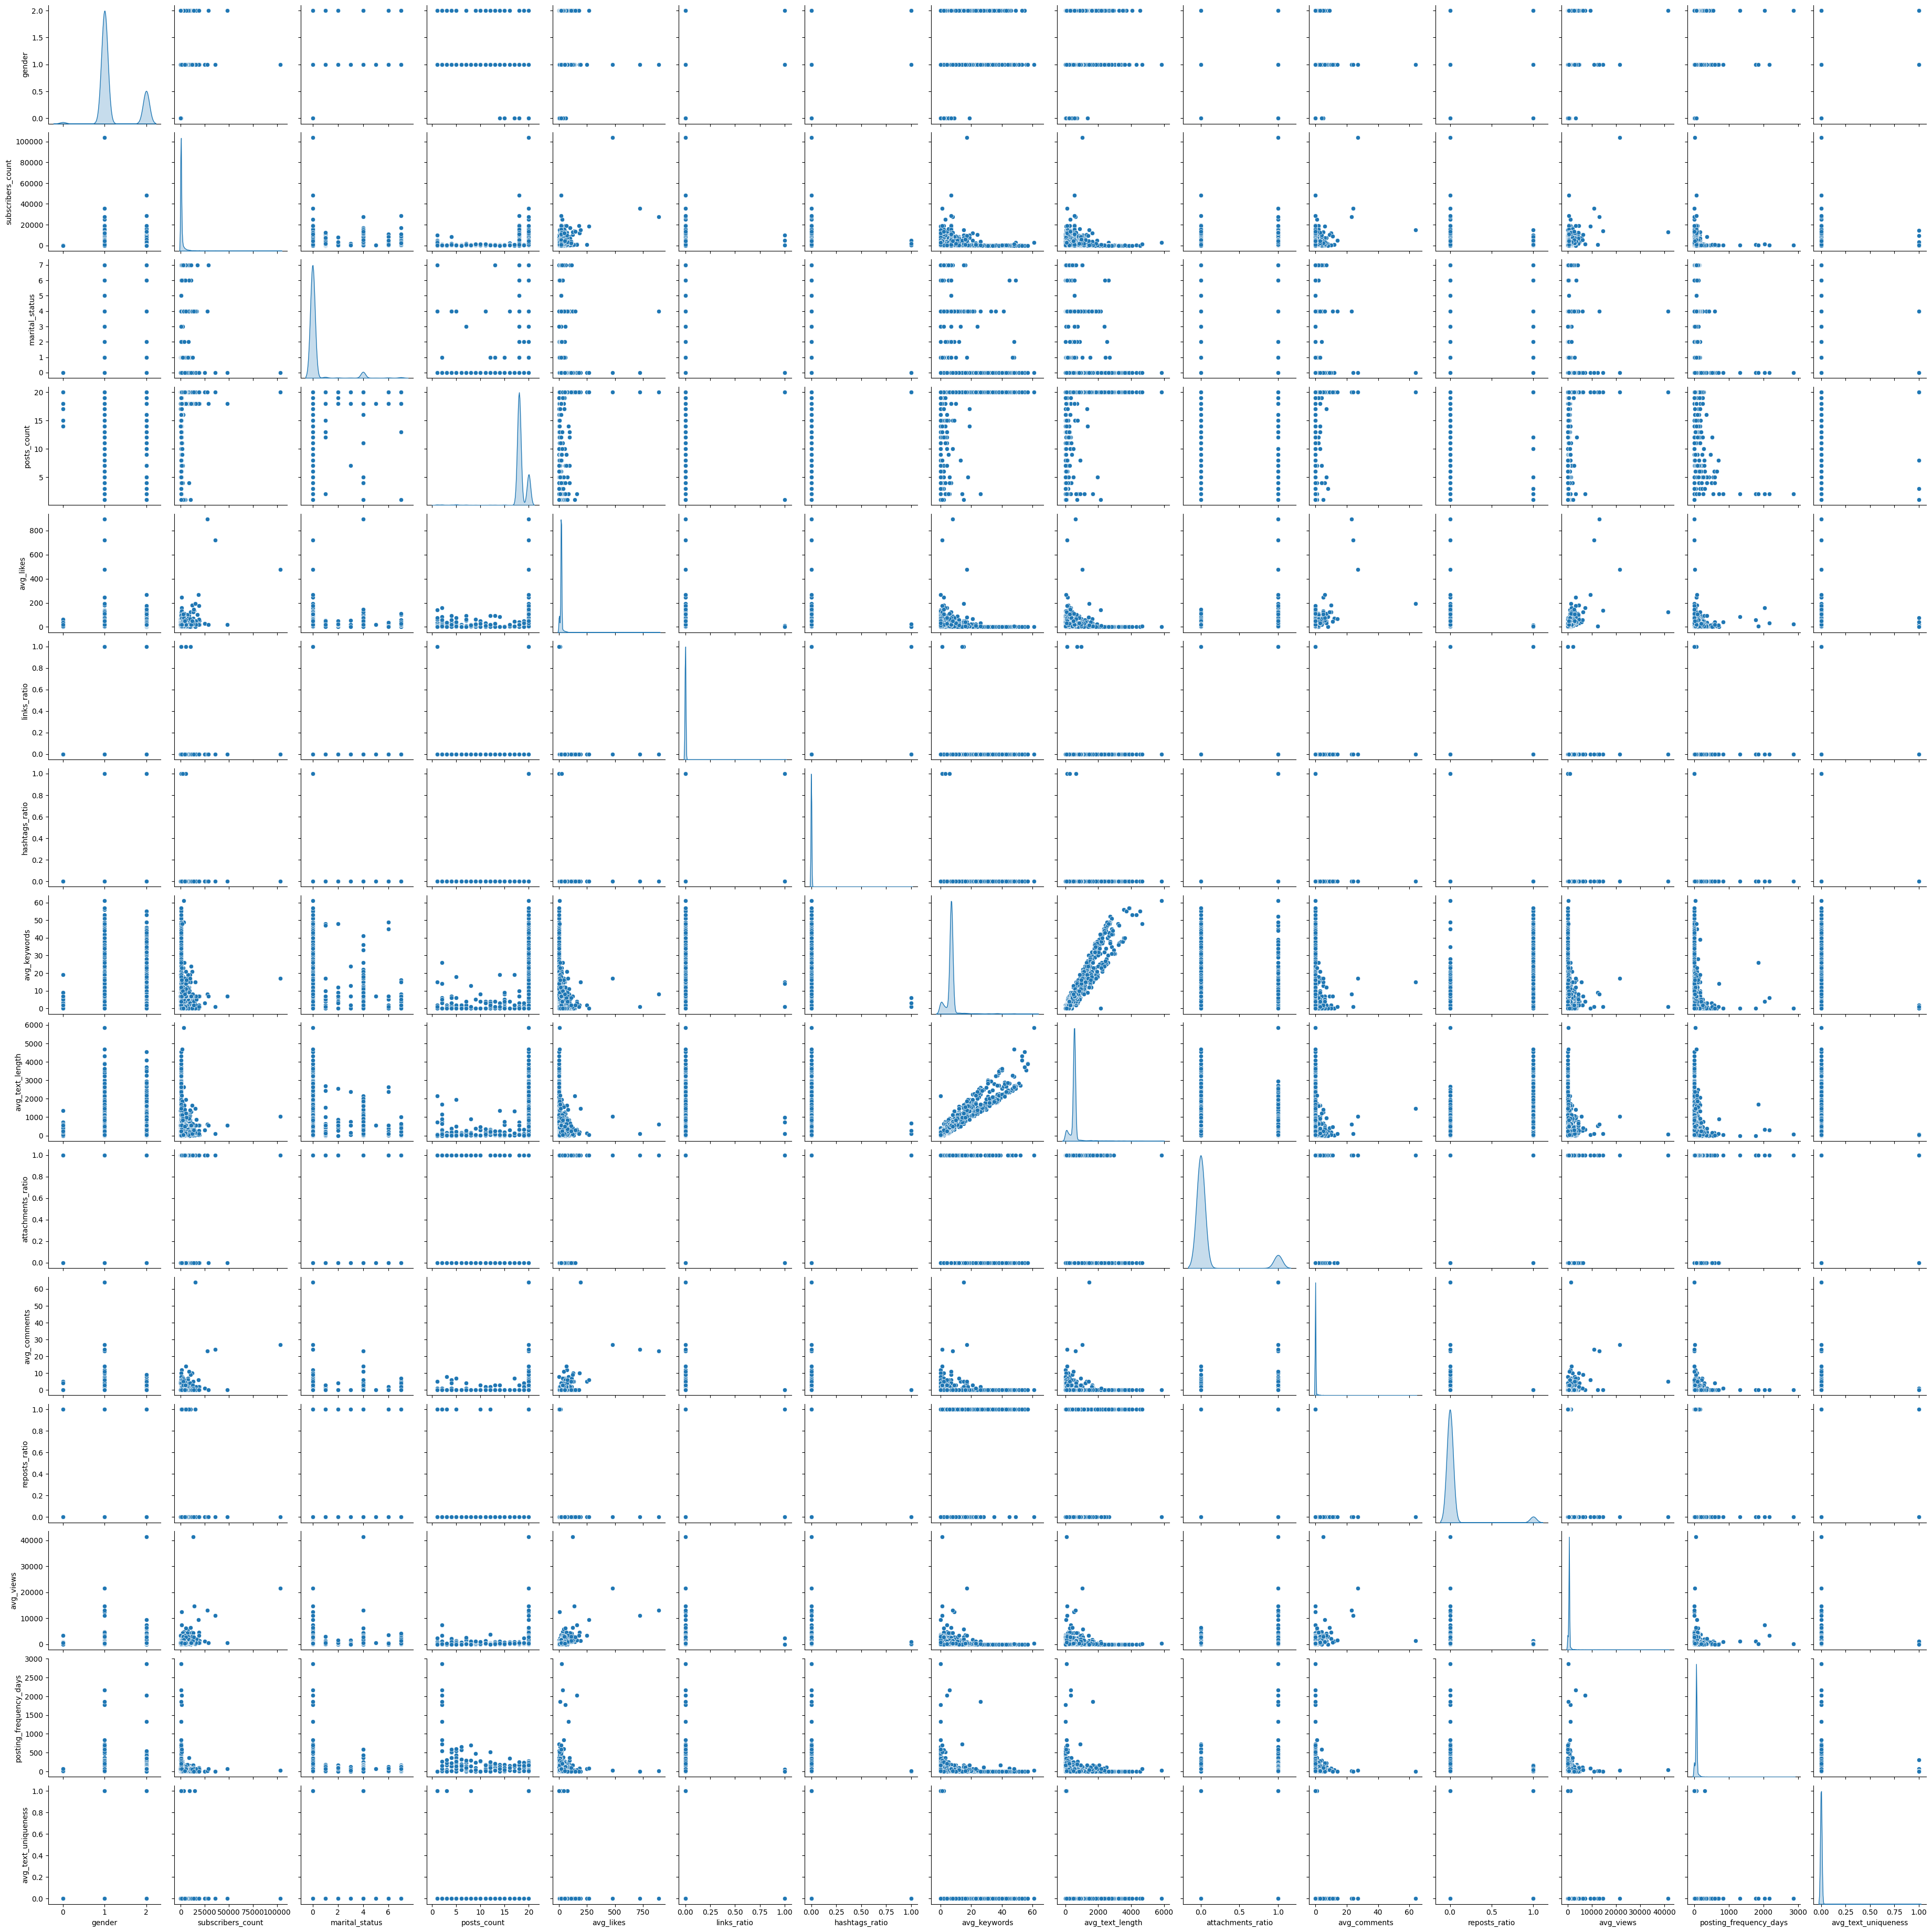

In [27]:
# PAIR PLOT
if set(feat).issubset(df.columns):
    sns.pairplot(df[feat].dropna(),diag_kind='kde')
    plt.show()

In [28]:
df

,gender,target,subscribers_count,marital_status,posts_count,avg_likes,links_ratio,hashtags_ratio,avg_keywords,avg_text_length,attachments_ratio,avg_comments,reposts_ratio,avg_views,posting_frequency_days,avg_text_uniqueness
0,1,1,0,0,18,19,0,0,7,544,0,0,0,623,66,0
1,1,1,0,0,18,19,0,0,7,544,0,0,0,623,66,0
2,1,1,0,0,18,19,0,0,7,544,0,0,0,623,66,0
3,1,1,0,0,18,19,0,0,7,544,0,0,0,623,66,0
4,1,1,0,0,18,19,0,0,7,544,0,0,0,623,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,2,0,0,0,18,19,0,0,7,544,0,0,0,623,66,0
5870,1,0,0,0,18,19,0,0,7,544,0,0,0,623,66,0
5871,2,0,0,0,18,19,0,0,7,544,0,0,0,623,66,0
5872,1,0,778,0,18,19,0,0,7,544,0,0,0,623,66,0


In [29]:
df['target'].value_counts()

target
1    2937
0    2937
Name: count, dtype: int64

# MODELS

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [32]:
X = df.drop(columns=['target'])
y = df['target']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [35]:
df['posts_count'].value_counts()

posts_count
18    4488
20    1229
5       21
1       16
2       16
15      12
7       11
4       11
19       8
12       8
13       8
6        7
3        7
9        6
11       5
14       5
8        5
10       4
16       4
17       3
Name: count, dtype: int64

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(class_weight='balanced'),
    "RandomForest Classifier": RandomForestClassifier(class_weight='balanced',max_depth= 20, min_samples_split= 2, n_estimators= 100),
    "GradientBoosting Classifier": GradientBoostingClassifier(learning_rate =0,max_depth=10),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "SVC": SVC(class_weight='balanced',C= 100, gamma= 'auto', kernel= 'rbf'),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "MLP Classifier": MLPClassifier(),
    "XGB Classifier": XGBClassifier(scale_pos_weight=3654/1045),  # XGBoost uses scale_pos_weight
    "LGBM Classifier": LGBMClassifier(class_weight='balanced')
}

# Store results
results = {}

# Train & evaluate models
for name, model in models.items():  # Use 'model' instead of 'model2' to avoid overwriting
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}


print('-------------------------------------------------------------------------------------------------------------------------------------------------')
# Print results
for model, scores in results.items():
    print(f"\nModel :{model}")
    print(f"Score :{scores}")
print('--------------------------------------------------------------------------------------------------------------------------------------------------')

[LightGBM] [Info] Number of positive: 2363, number of negative: 2363
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 4726, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
-------------------------------------------------------------------------------------------------------------------------------------------------

Model :Decision Tree Classifier
Score :{'MAE': 0.16595744680851063, 'MSE': 0.16595744680851063, 'R² Score': 0.33581951103561425}

Model :RandomForest Classifier
Score :{'MAE': 0.1548936170212766, 'MSE': 0.1548936170212766, 'R² Score': 0.38009821029990665}

Model :GradientBoosting Classifier
Score :{'MAE': 0.5114893617021277, 'MSE': 0.5114893617021277,

# CONCLUSION :
> NEED OF HYPER-PARAMETER TUENING.